# AI and Human AI Performance

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import random
import copy
import pickle
import random
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# CUB

In [3]:
random.seed(42)


with open('../data/Classification-Summary-CUB.pickle', 'rb') as f:
  classification_summary_cub = pickle.load(f)

In [4]:
classification_summary_cub.keys()

dict_keys(['GT', 'resnet_pred', 'knn_pred', 'emd_pred', 'chm_pred', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf'])

### Unpacking 

In [5]:
GT_CUB     = classification_summary_cub['GT']

M1Prediction_CUB = classification_summary_cub['resnet_pred']
M2Prediction_CUB = classification_summary_cub['knn_pred']   
M3Prediction_CUB = classification_summary_cub['emd_pred']   
M4Prediction_CUB = classification_summary_cub['chm_pred']   
   
IsM1Correct_CUB = classification_summary_cub['resnet_wnid']
IsM2Correct_CUB = classification_summary_cub['knn_wnid']   
IsM3Correct_CUB = classification_summary_cub['emd_wnid']   
IsM4Correct_CUB = classification_summary_cub['chm_wnid']   

M1Conf_CUB = classification_summary_cub['resnet_conf'] 
M2Conf_CUB = classification_summary_cub['knn_conf']    
M3Conf_CUB = classification_summary_cub['emd_conf']    
M4Conf_CUB = classification_summary_cub['chm_conf']    

In [6]:
MethodName_CUB = ['ResNet', 'KNN', 'EMD', 'CHM']
Methods_CUB    = [IsM1Correct_CUB, IsM2Correct_CUB, IsM3Correct_CUB, IsM4Correct_CUB]
Confs_CUB      = [M1Conf_CUB, M2Conf_CUB, M3Conf_CUB,M4Conf_CUB]

TAnalysis_CUB = {}

for N, M, C in zip(MethodName_CUB, Methods_CUB, Confs_CUB):
  TAnalysis_CUB[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis_CUB[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 289.54it/s]


## Fine-tune on 1K, Test on 4K

In [7]:
def split_data_1k_4k(a, b):
  zipped = list(zip(a, b))
  random.shuffle(zipped)
  ra, rb = zip(*zipped)
  return ra[:1000], rb[:1000],  ra[1000:], rb[1000:]

In [8]:
MethodName_CUB = ['ResNet', 'KNN', 'EMD', 'CHM']

IsM1Correct_T_CUB, M1Conf_T_CUB, IsM1Correct_V_CUB, M1Conf_V_CUB = split_data_1k_4k(IsM1Correct_CUB, M1Conf_CUB)
IsM2Correct_T_CUB, M2Conf_T_CUB, IsM2Correct_V_CUB, M2Conf_V_CUB = split_data_1k_4k(IsM2Correct_CUB, M2Conf_CUB)
IsM3Correct_T_CUB, M3Conf_T_CUB, IsM3Correct_V_CUB, M3Conf_V_CUB = split_data_1k_4k(IsM3Correct_CUB, M3Conf_CUB)
IsM4Correct_T_CUB, M4Conf_T_CUB, IsM4Correct_V_CUB, M4Conf_V_CUB = split_data_1k_4k(IsM4Correct_CUB, M4Conf_CUB)

Methods_T_CUB = [IsM1Correct_T_CUB, IsM2Correct_T_CUB, IsM3Correct_T_CUB, IsM4Correct_T_CUB]
Confs_T_CUB   = [M1Conf_T_CUB, M2Conf_T_CUB, M3Conf_T_CUB, M4Conf_T_CUB]

TAnalysis_T_CUB = {}

for N, M, C in zip(MethodName_CUB, Methods_T_CUB, Confs_T_CUB):
  TAnalysis_T_CUB[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis_T_CUB[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 1630.54it/s]


In [9]:
Methods_V_CUB = [IsM1Correct_V_CUB, IsM2Correct_V_CUB, IsM3Correct_V_CUB, IsM4Correct_V_CUB]
Confs_V_CUB   = [M1Conf_V_CUB, M2Conf_V_CUB, M3Conf_V_CUB, M4Conf_V_CUB]

TAnalysis_V_CUB = {}

for N, M, C in zip(MethodName_CUB, Methods_V_CUB, Confs_V_CUB):
  TAnalysis_V_CUB[N] = {}
  for T in tqdm(np.arange(0., 1.05, 0.05)):
    TAnalysis_V_CUB[N][round(T, 2)] = np.average([x[0] == (x[1]>=T) for x in zip(M, C)])

100%|██████████| 21/21 [00:00<00:00, 372.08it/s]


In [10]:
# Full 5K
pd.DataFrame(TAnalysis_CUB).T.style.highlight_max(color = 'yellow', axis = 1)

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
ResNet,0.858302,0.858302,0.858302,0.858474,0.859855,0.860891,0.862962,0.866068,0.869002,0.871246,0.874008,0.876251,0.873835,0.874871,0.866759,0.858819,0.848119,0.829134,0.808423,0.724197,0.141698
KNN,0.854677,0.854677,0.854677,0.856058,0.856058,0.857784,0.868139,0.876769,0.876769,0.876942,0.874180,0.857784,0.812910,0.812910,0.739558,0.739558,0.692613,0.591301,0.591301,0.426993,0.426993
EMD,0.849845,0.849845,0.849845,0.851743,0.851743,0.853469,0.864860,0.869520,0.869520,0.868830,0.862271,0.846393,0.786158,0.786158,0.705212,0.705212,0.650155,0.541422,0.541422,0.343459,0.343459
CHM,0.832758,0.832758,0.832758,0.833448,0.833448,0.835174,0.850017,0.853987,0.853987,0.857094,0.845530,0.823438,0.742147,0.742147,0.636348,0.636348,0.570245,0.418536,0.418536,0.261305,0.261305


In [11]:
# 1K Fine-tuning
pd.DataFrame(TAnalysis_T_CUB).T.style.highlight_max(color = 'yellow', axis = 1)

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
ResNet,0.875000,0.875000,0.875000,0.876000,0.876000,0.878000,0.876000,0.876000,0.879000,0.881000,0.887000,0.888000,0.882000,0.884000,0.868000,0.855000,0.844000,0.818000,0.789000,0.690000,0.125000
KNN,0.866000,0.866000,0.866000,0.866000,0.866000,0.867000,0.882000,0.891000,0.891000,0.891000,0.877000,0.862000,0.827000,0.827000,0.743000,0.743000,0.687000,0.567000,0.567000,0.422000,0.422000
EMD,0.846000,0.846000,0.846000,0.849000,0.849000,0.849000,0.863000,0.863000,0.863000,0.869000,0.863000,0.845000,0.782000,0.782000,0.711000,0.711000,0.644000,0.539000,0.539000,0.335000,0.335000
CHM,0.832000,0.832000,0.832000,0.833000,0.833000,0.835000,0.854000,0.855000,0.855000,0.868000,0.855000,0.832000,0.752000,0.752000,0.649000,0.649000,0.589000,0.435000,0.435000,0.270000,0.270000


In [12]:
# 4K Test PREVIEW
pd.DataFrame(TAnalysis_V_CUB).T.loc[:, 0.35:0.55]*100

,0.35,0.40,0.45,0.50,0.55
ResNet,86.399666,86.691698,86.921151,87.129746,87.380058
KNN,87.380058,87.380058,87.400918,87.359199,85.690446
EMD,87.088027,87.088027,86.879433,86.211932,84.668335
CHM,85.377555,85.377555,85.481852,84.355444,82.165207


In [13]:
optimal_t = pd.DataFrame(TAnalysis_T_CUB).T.idxmax(axis=1)

In [14]:
optimal_t

ResNet    0.55
KNN       0.35
EMD       0.45
CHM       0.45
dtype: float64

In [15]:
tdf = pd.DataFrame(TAnalysis_T_CUB).T
max_indices = np.where(tdf == tdf.max(axis=1)[:, np.newaxis], tdf.columns, None)
max_indices = np.where(max_indices == None, -1, max_indices)
max_indices =  np.amax(max_indices, axis=1)
max_indices

/var/folders/gs/ftfl94c117q3mq9rqwfnx1mc0000gn/T/ipykernel_64746/1938729335.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  max_indices = np.where(tdf == tdf.max(axis=1)[:, np.newaxis], tdf.columns, None)


array([0.55, 0.45, 0.45, 0.45], dtype=object)

In [16]:
# clone optimal_t but with values of max_indices
optima_t_max = optimal_t.copy()
optima_t_max[:] = max_indices
optima_t_max

ResNet    0.55
KNN       0.45
EMD       0.45
CHM       0.45
dtype: object

In [17]:
optimal_t = optima_t_max

In [18]:
df = pd.DataFrame(TAnalysis_V_CUB).loc[optimal_t, :]
# pick diagonal
ai_performance_values = df.to_numpy()[np.arange(4), np.arange(4)]*100

In [19]:
ai_performance_df = pd.DataFrame(ai_performance_values, index=optimal_t.index, columns=['AI Performance'])

## Final Table for AI Performance

In [20]:
ai_performance_df.round(2) # Final Table for AI Performance

,AI Performance
ResNet,87.38
KNN,87.40
EMD,86.88
CHM,85.48


# Human-AI Team Performance

###  Load summary fo AI Performance

In [21]:
random.seed(42)

with open("../data/Classification-Summary-CUB.pickle", "rb") as f:
    classification_summary_cub = pickle.load(f)

In [22]:
classification_summary_cub.keys()

dict_keys(['GT', 'resnet_pred', 'knn_pred', 'emd_pred', 'chm_pred', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf'])

### Unpacking

In [23]:
GT_CUB = classification_summary_cub["GT"]

M1Prediction_CUB = classification_summary_cub["resnet_pred"]
M2Prediction_CUB = classification_summary_cub["knn_pred"]
M3Prediction_CUB = classification_summary_cub["emd_pred"]
M4Prediction_CUB = classification_summary_cub["chm_pred"]

IsM1Correct_CUB = np.asarray(classification_summary_cub["resnet_wnid"])
IsM2Correct_CUB = np.asarray(classification_summary_cub["knn_wnid"])
IsM3Correct_CUB = np.asarray(classification_summary_cub["emd_wnid"])
IsM4Correct_CUB = np.asarray(classification_summary_cub["chm_wnid"])

M1Conf_CUB = np.asarray(classification_summary_cub["resnet_conf"])
M2Conf_CUB = np.asarray(classification_summary_cub["knn_conf"])
M3Conf_CUB = np.asarray(classification_summary_cub["emd_conf"])
M4Conf_CUB = np.asarray(classification_summary_cub["chm_conf"])

## AI Performance Analysis

In [24]:
MethodName = ["ResNet", "KNN", "EMD", "CHM"]
Methods = [IsM1Correct_CUB, IsM2Correct_CUB, IsM3Correct_CUB, IsM4Correct_CUB]
Confs = [M1Conf_CUB, M2Conf_CUB, M3Conf_CUB, M4Conf_CUB]

TAnalysis = {}
TCount = {}

for N, M, C in zip(MethodName, Methods, Confs):
    TAnalysis[N] = {}
    TCount[N] = {}

    for T in np.arange(0.0, 1.05, 0.05):
        TAnalysis[N][round(T, 2)] = np.mean(M[C >= T])
        TCount[N][round(T, 2)] = len(M[C >= T])


ai_df = pd.DataFrame(TAnalysis)
print("Done")

Done


/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Number of Images 

In [25]:
# Number of Images
count_df = pd.DataFrame(TCount)
count_df

,ResNet,KNN,EMD,CHM
0.00,5794,5794,5794,5794
0.05,5794,5794,5794,5794
0.10,5794,5794,5794,5794
0.15,5789,5786,5783,5786
0.20,5777,5786,5783,5786
0.25,5759,5772,5765,5766
0.30,5729,5632,5591,5550
0.35,5689,5478,5428,5341
0.40,5646,5478,5428,5341
0.45,5563,5281,5180,5043


## Ratios (out of `5794` Images)

In [26]:
# RATIOs (out of 5794 Images)
ratio_df = pd.DataFrame(TCount) / len(GT_CUB)
ratio_df

,ResNet,KNN,EMD,CHM
0.00,1.000000,1.000000,1.000000,1.000000
0.05,1.000000,1.000000,1.000000,1.000000
0.10,1.000000,1.000000,1.000000,1.000000
0.15,0.999137,0.998619,0.998101,0.998619
0.20,0.997066,0.998619,0.998101,0.998619
0.25,0.993959,0.996203,0.994995,0.995167
0.30,0.988781,0.972040,0.964964,0.957887
0.35,0.981878,0.945461,0.936831,0.921816
0.40,0.974456,0.945461,0.936831,0.921816
0.45,0.960131,0.911460,0.894028,0.870383


## Human Performance Analysis

In [27]:
summary_df = pd.read_csv("../data/CUB-Human-Study-Summary.csv")

### Removing Bad Users 



In [28]:
print(f"total {len(summary_df)} entries")

total 10860 entries


In [29]:
summary_df = summary_df.drop(summary_df[summary_df.Accuracy <= 0.5].index)

In [30]:
summary_df.head()

,UID,Query,Counter balance,Validation Reaction Time,Test Reaction Time,Date,Correctness,Accuracy,Total Corrects,Method,GroundTruth,ClassifierCorrectness,ConfidenceScore,DifficultyLevel,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf
0,5791dae225cb71000128ad5bNo-XAI,Hooded_Oriole_0105_90875.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,096.Hooded_Oriole,0,0.88,Hard,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,175.Pine_Warbler,0.88,0.0125,0.0175,0.0125
1,5791dae225cb71000128ad5bNo-XAI,Chuck_Will_Widow_0051_796991.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,022.Chuck_will_Widow,1,0.72,Medium,022.Chuck_will_Widow,105.Whip_poor_Will,105.Whip_poor_Will,105.Whip_poor_Will,0.72,0.0275,0.0225,0.0300
2,5791dae225cb71000128ad5bNo-XAI,Vesper_Sparrow_0065_125446.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,131.Vesper_Sparrow,0,0.63,Medium,115.Brewer_Sparrow,131.Vesper_Sparrow,131.Vesper_Sparrow,131.Vesper_Sparrow,0.63,0.0225,0.0275,0.0300
3,5791dae225cb71000128ad5bNo-XAI,Western_Wood_Pewee_0009_98115.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,0,0.566667,17,ResNet-50,102.Western_Wood_Pewee,0,0.78,Hard,039.Least_Flycatcher,102.Western_Wood_Pewee,040.Olive_sided_Flycatcher,102.Western_Wood_Pewee,0.78,0.0300,0.0200,0.0225
4,5791dae225cb71000128ad5bNo-XAI,Warbling_Vireo_0126_158696.jpg,6,412124.0,411022,2022-05-05 14:14:35.473,1,0.566667,17,ResNet-50,155.Warbling_Vireo,0,0.97,Hard,153.Philadelphia_Vireo,153.Philadelphia_Vireo,155.Warbling_Vireo,155.Warbling_Vireo,0.97,0.0250,0.0250,0.0250


In [31]:
print(f"total {len(summary_df)} etnries")

total 10650 etnries


In [32]:
df_treshold = copy.deepcopy(summary_df[["Method", "Correctness", "ConfidenceScore"]])

## Human Performance

In [33]:
ORDER_DICT = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

In [34]:
human_accuracy = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_accuracy[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .mean()
    )

In [35]:
humand_df = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
    .T
)

humand_df = humand_df.drop("Method")
humand_df.columns = ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
humand_df

,ResNet-50,kNN,EMD-NN,EMD-Corr,CHM-NN,CHM-Corr
0.00,NaN,NaN,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,NaN,NaN
0.10,NaN,NaN,NaN,NaN,NaN,NaN
0.15,1.0,1.0,0.6,1.0,0.8,1.0
0.20,0.764706,1.0,0.6,1.0,0.8,1.0
0.25,0.794872,0.681818,0.6875,0.866667,0.615385,0.538462
0.30,0.839286,0.507042,0.557047,0.69697,0.551351,0.722222
0.35,0.764045,0.478261,0.492126,0.603571,0.549206,0.710611
0.40,0.721739,0.478261,0.492126,0.603571,0.549206,0.710611
0.45,0.693642,0.508516,0.476658,0.587007,0.531915,0.635776


In [36]:
def make_table(ai_group, human_group):
    agg_df = pd.DataFrame()
    agg_df["T"] = humand_df.index
    agg_df["T"] = agg_df["T"].astype(float).apply(lambda x: np.round(x, 2))
    agg_df["Ratio of Images Handled by AI"] = ratio_df[ai_group].values
    
    agg_df["AI Alone Performance"] = ai_df[ai_group].values
    agg_df["Human Performance on Remaining Images"] = humand_df[human_group].values
    agg_df["Aggregated Performance"] = (
        agg_df["Ratio of Images Handled by AI"] * agg_df["AI Alone Performance"]
    ) + (
        (1 - agg_df["Ratio of Images Handled by AI"])
        * agg_df["Human Performance on Remaining Images"]
    )

    agg_df = agg_df.set_index("T")

    agg_df["AI Alone Performance"] = (100 * agg_df["AI Alone Performance"]).round(2)
    agg_df["Human Performance on Remaining Images"] = (
        (100 * agg_df["Human Performance on Remaining Images"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Aggregated Performance"] = (
        (100 * agg_df["Aggregated Performance"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Ratio of Images Handled by AI"] = 100*agg_df[
        "Ratio of Images Handled by AI"
    ].round(4)

    return agg_df

In [37]:
method_tables = {}

for ai_group, human_group in zip(
    ["ResNet", "KNN", "EMD", "EMD", "CHM", "CHM"], ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
):
    method_tables[human_group] = make_table(ai_group, human_group)


In [38]:
optimal_t

ResNet    0.55
KNN       0.45
EMD       0.45
CHM       0.45
dtype: object

In [39]:
method_tables['ResNet-50'].loc[[optimal_t['ResNet']]]


,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.55,92.16,89.85,59.27,87.45


In [40]:
Aggregated_performance = {}

for ai_group, human_group in zip(
    ["ResNet", "KNN", "EMD", "EMD", "CHM", "CHM"], ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
):
    Aggregated_performance[human_group] = method_tables[human_group].loc[[optimal_t[ai_group]]]['Aggregated Performance'].reset_index(drop=True)

Aggregated_performance_df = pd.DataFrame.from_dict(Aggregated_performance).T

In [41]:
method_tables['ResNet-50'].loc[[optimal_t['ResNet']]]


,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.55,92.16,89.85,59.27,87.45


In [42]:
method_tables['kNN'].loc[[optimal_t['KNN']]]


,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.45,91.15,90.13,50.85,86.66


In [43]:
ai_performance_df.round(2)

,AI Performance
ResNet,87.38
KNN,87.40
EMD,86.88
CHM,85.48


In [44]:
# remove index
Aggregated_performance_df

,0
ResNet-50,87.45
kNN,86.66
EMD-NN,85.69
EMD-Corr,86.86
CHM-NN,84.91
CHM-Corr,86.25


In [45]:
# combining two df
# rename index to match the names
ai_performance_df.index = ['ResNet-50', 'kNN', 'EMD-Corr', 'CHM-Corr']

combined_table = pd.concat([ai_performance_df.round(2), Aggregated_performance_df, ], axis=1)
combined_table.columns = ['AI Alone Performance', 'Human-AI Performance']

# calculate the delta
combined_table['Improvement'] = combined_table['Human-AI Performance'] - combined_table['AI Alone Performance']


In [46]:
combined_table

,AI Alone Performance,Human-AI Performance,Improvement
ResNet-50,87.38,87.45,0.07
kNN,87.40,86.66,-0.74
EMD-Corr,86.88,86.86,-0.02
CHM-Corr,85.48,86.25,0.77
EMD-NN,NaN,85.69,NaN
CHM-NN,NaN,84.91,NaN


In [47]:
# drop last two rows
combined_table = combined_table.drop(['EMD-NN', 'CHM-NN'])

In [48]:
combined_table

,AI Alone Performance,Human-AI Performance,Improvement
ResNet-50,87.38,87.45,0.07
kNN,87.40,86.66,-0.74
EMD-Corr,86.88,86.86,-0.02
CHM-Corr,85.48,86.25,0.77


In [49]:
# Add a row for calculating the average
combined_table.loc['Average'] = combined_table.mean()

# Paper Table 3 - ImageNet

In [50]:
combined_table.round(2)

,AI Alone Performance,Human-AI Performance,Improvement
ResNet-50,87.38,87.45,0.07
kNN,87.40,86.66,-0.74
EMD-Corr,86.88,86.86,-0.02
CHM-Corr,85.48,86.25,0.77
Average,86.78,86.80,0.02


## Additional Results 

Trails Breakdown on optimal `T=0.55` for `ResNet-50`

In [51]:
optima_t_max

ResNet    0.55
KNN       0.45
EMD       0.45
CHM       0.45
dtype: object

In [52]:
def get_breakdown_by_t_and_classifier(df, T, classifier="ResNet-50"):
    df_rn_AI = df[df["ConfidenceScore"] >= T]
    df_rn_Human = df[df["ConfidenceScore"] < T]
    return Counter(
        df_rn_Human[df_rn_Human["Method"] == classifier]["ClassifierCorrectness"]
    )

In [53]:
get_breakdown_by_t_and_classifier(summary_df, 0.5, classifier="ResNet-50")

Counter({0: 215, 1: 19})

In [54]:
human_trial_counters = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_trial_counters[f"{T:0.2f}"] = get_breakdown_by_t_and_classifier(summary_df, T, classifier="ResNet-50")

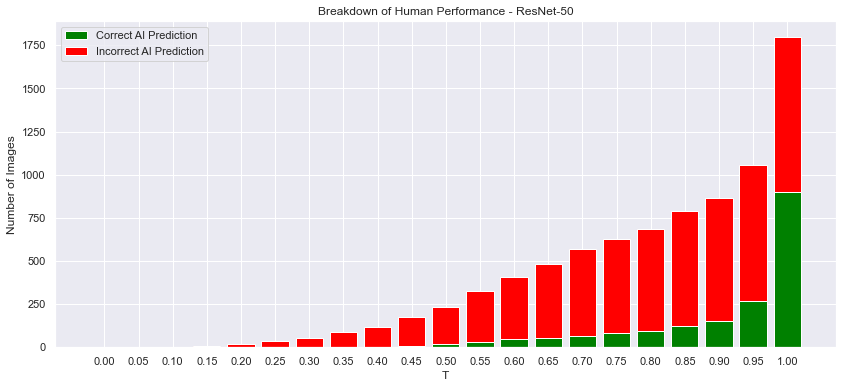

In [55]:
# plot the breakdown
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Breakdown of Human Performance - ResNet-50')

# plot human_trial_counters counters for each T
for T in np.arange(0.0, 1.05, 0.05):
    counter = human_trial_counters[f"{T:0.2f}"]
    ax.bar(f"{T:0.2f}", counter[True], color='green')
    ax.bar(f"{T:0.2f}", counter[False], bottom=counter[True], color='red')

ax.set_xlabel('T')
ax.set_ylabel('Number of Images')
ax.legend(['Correct AI Prediction', 'Incorrect AI Prediction'])
plt.show()

In [56]:
human_count = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_count[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .count()
    )

In [57]:
df_hp = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

trials_df = (
    pd.DataFrame.from_dict(human_count)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)

In [58]:
# ONLY FOR RESNET-50

classifier_index_dict = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

classifier_index = classifier_index_dict["ResNet-50"]
detailed_df = df_hp.loc[classifier_index].reset_index()
detailed_df.rename(columns={classifier_index: "Human Performance"}, inplace=True)
detailed_df.rename(columns={"index": "T"}, inplace=True)

detailed_df["# Trials"] = trials_df.loc[classifier_index].reset_index()[
    classifier_index
]
detailed_df = detailed_df.drop(0)

detailed_df["Human Performance"] = detailed_df["Human Performance"] * 100

detailed_df["# Trials"] = detailed_df["# Trials"].astype("Int64")
detailed_df["Human Performance"] = detailed_df["Human Performance"].astype("float")

human_trial_counters_C = [
    x[1] if 1 in x.keys() else 0 for x in human_trial_counters.values()
]
human_trial_counters_W = [
    x[0] if 0 in x.keys() else 1 for x in human_trial_counters.values()
]

detailed_df["# Trials - Correct Prediction"] = human_trial_counters_C
detailed_df["# Trials - Wrong Prediction"] = human_trial_counters_W


In [59]:
detailed_df.round(2)

,T,Human Performance,# Trials,# Trials - Correct Prediction,# Trials - Wrong Prediction
1,0.00,NaN,<NA>,0,1
2,0.05,NaN,<NA>,0,1
3,0.10,NaN,<NA>,0,1
4,0.15,100.00,5,1,4
5,0.20,76.47,17,1,16
6,0.25,79.49,39,1,38
7,0.30,83.93,56,1,55
8,0.35,76.40,89,1,88
9,0.40,72.17,115,1,114
10,0.45,69.36,173,8,165


In [60]:
detailed_df.round(2)

,T,Human Performance,# Trials,# Trials - Correct Prediction,# Trials - Wrong Prediction
1,0.00,NaN,<NA>,0,1
2,0.05,NaN,<NA>,0,1
3,0.10,NaN,<NA>,0,1
4,0.15,100.00,5,1,4
5,0.20,76.47,17,1,16
6,0.25,79.49,39,1,38
7,0.30,83.93,56,1,55
8,0.35,76.40,89,1,88
9,0.40,72.17,115,1,114
10,0.45,69.36,173,8,165


### Plot some of the images

For `ResNet-50` @ `T=0.45`

In [61]:
import torchvision.transforms as transforms
from PIL import Image
from glob import glob

In [62]:
display_transform = transforms.Compose(
    [transforms.Resize(256), transforms.CenterCrop(240)]
)

In [63]:
df_rn_AI = summary_df[summary_df["ConfidenceScore"] >= 0.45]
df_rn_Human = summary_df[summary_df["ConfidenceScore"] < 0.45]

In [64]:
Q = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["Query"].values
G = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["GroundTruth"].values
C = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Conf"].values
P = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]["ResNet-Prediction"].values

In [65]:
cub_root = './Datasets/CUB'
all_images = glob(f'{cub_root}/*/*/*.jpg')
Q_to_path = {q:x for q in Q for x in all_images if q in x}

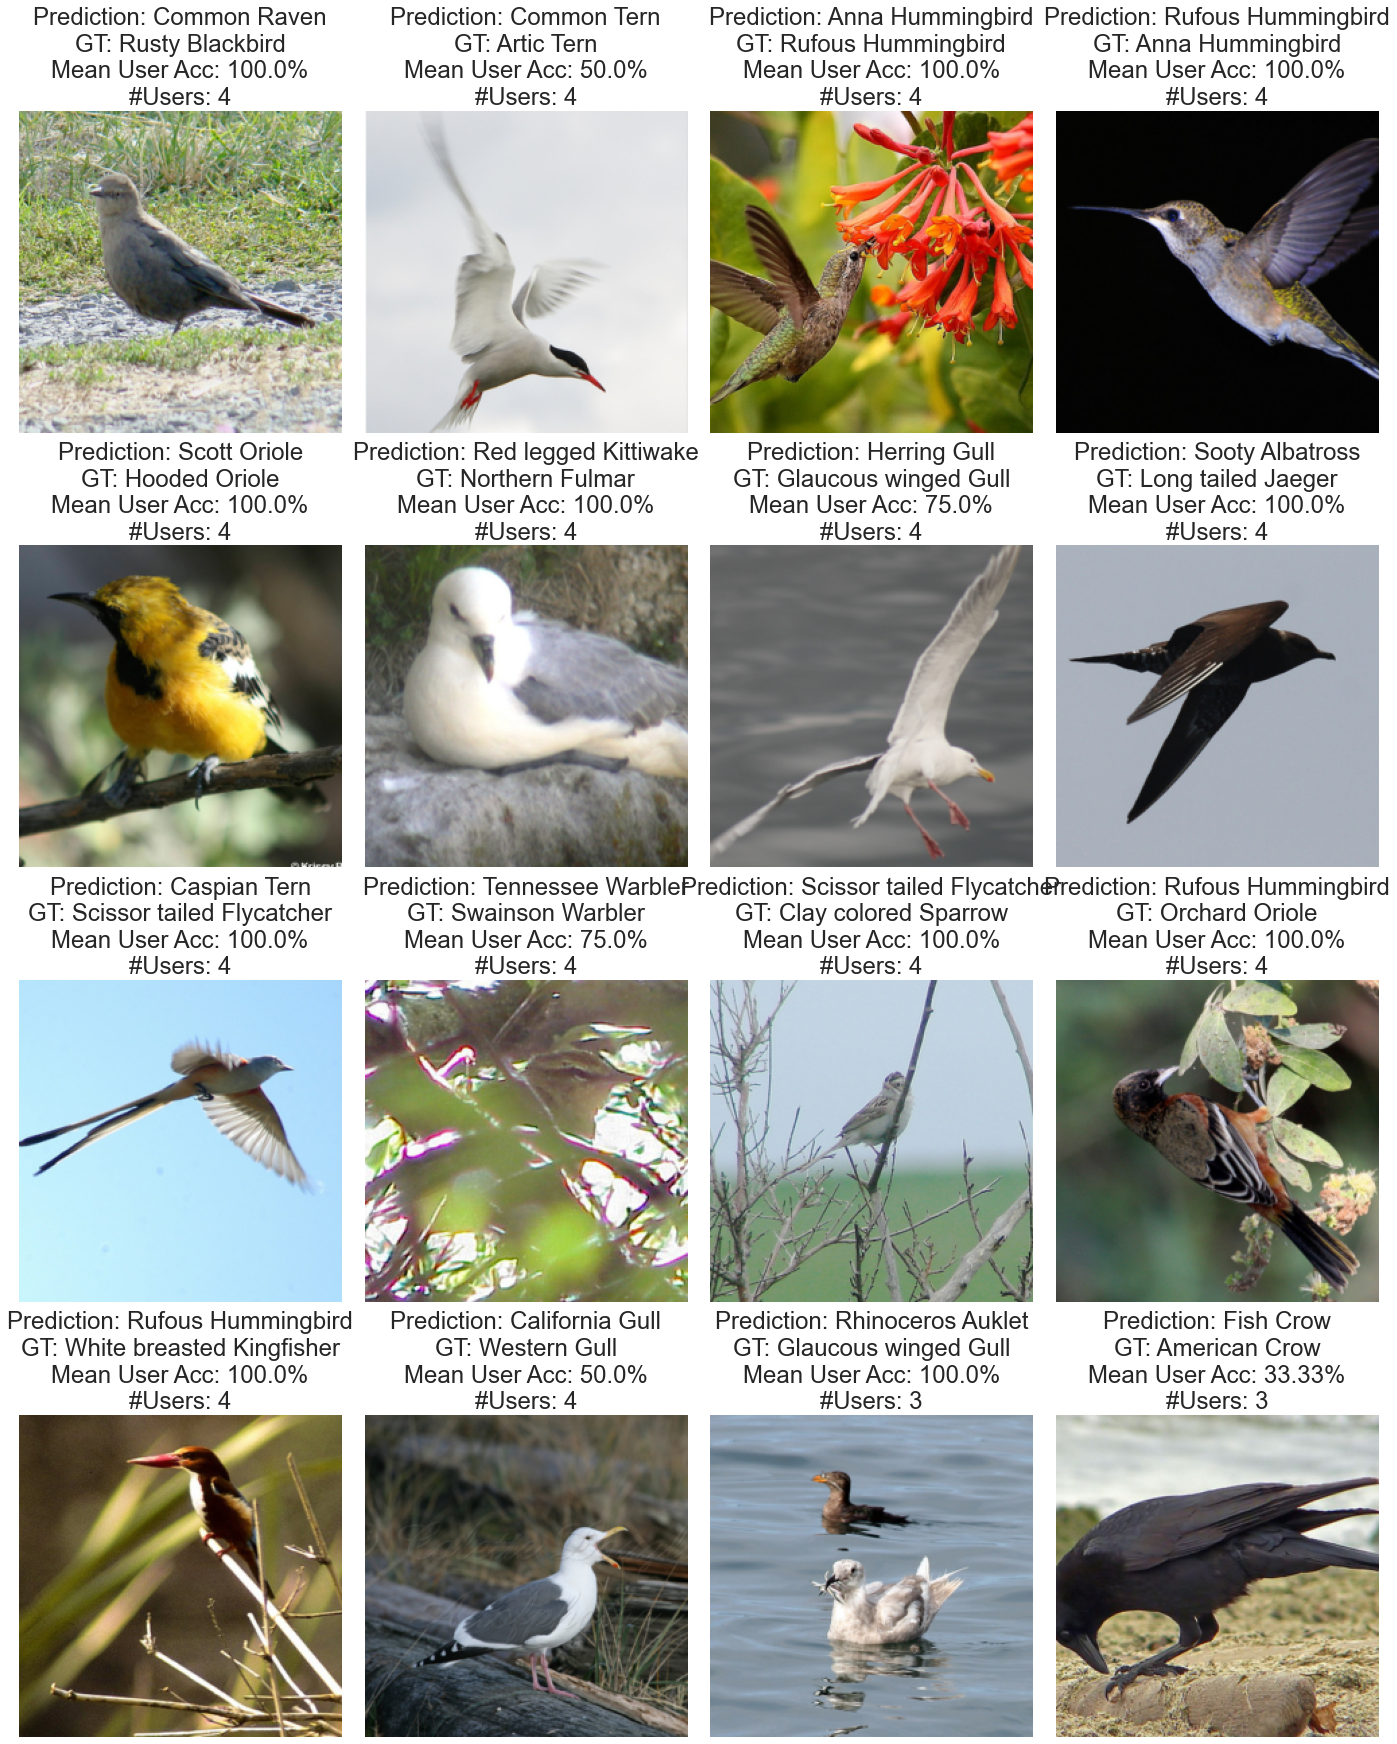

In [79]:
scale_factor = 6
fig, axes = plt.subplots(4, 4, figsize=(3.25 * scale_factor, 4 * scale_factor))

for ax in axes.flat:
    ax.set_axis_off()


for i in range(4):
    for j in range(4):
        CTR =  1+(i * 4 + j)
        item = str(Q[CTR])
        tmp = df_rn_Human[df_rn_Human["Method"] == "ResNet-50"]
        users = tmp[tmp["Query"] == Q[CTR]]
        axes[i, j].imshow(display_transform(Image.open(Q_to_path[Q[CTR]])))
        mua = (100*np.mean(users["Correctness"])).round(2)

        axes[i, j].set_title(
            f"Prediction: {str(P[CTR].split('.')[-1].replace('_', ' '))}\nGT: {G[CTR].split('.')[-1].replace('_', ' ')}\nMean User Acc: {mua}%\n#Users: {users.shape[0]}",
            fontsize=24,
        )

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.35)
fig.savefig('resnet_50_human_ai_team_cub.pdf', format='pdf', dpi=300, bbox_inches='tight')